### Why perform Cross-Validation?

- Model performance is highly dependent on the **train/test split** of the dataset.

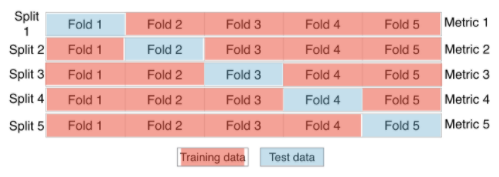

- This allows the model to see all the data (ie. train on all chunks of the data) and use different holds out to test the accuracy, getting in this case 5 Rsquared.
    - This then allows for the option of computing statistics of interest, such as the mean and median and 95% confidence intervals

##### Cross - Validation using the LInear Regression Modeling

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

cv_results=cross_val_score(reg, X, y, cv=5)  #5-fold cross-validation

print(cv_results)
np.mean(cv_results)

### Hold Out Test Set + GridSearch + Best Hyperparameters

- Using ALL data for cross-validation is not ideal
- Split data into training AND hold-out (test) set at the beginning
- Perform grid search cross-validation on the training dataset
- And then choose the best hyperparameters and evaluate on hold-out set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

#instantiating model
logreg = LogisticRegression()

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

#instantiating the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, #defined above
                         param_grid, #defined above
                         cv=5)

#fit the GridSearchCV with logre and parameter grid to training data
logreg_cv.fit(X_train, y_train)

#print out optimal params and scores
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

#predict on test (hold-out) set and kick out the evaluation metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))